In [1]:
import json
import time
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output
from IPython.core.interactiveshell import InteractiveShell

from manim import *
params = f" -v WARNING -r {80*4},{40*4} -s  --disable_caching Example"
import PIL

cell_counter = 0

@register_cell_magic
def capture_png(line, cell):
    global cell_counter
    cell_counter += 1
    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array = line.split('--style')
    post_path = argument_array[0].strip()
    chapter_name_underscore = chapter_name.replace(" ", "_")

    path = f"gallery_assets/{chapter_name_underscore}_{cell_counter:03}_{post_path}"

  #  path = path.split(".png")[0] + str(time.time_ns()) + ".png" time stemps not needed
    if not path:
        raise ValueError('No path found!')

    style = str(*argument_array[1:])
    style = style.strip()
    style = style.strip('"')  # remove quotes

    default_style = ""

    style = default_style + style

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline
    
    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline= codeline.replace("#ONLY", "") 
            if codeline.startswith("        "): # delete the indention for manim -> TODO this can be made prettier!
                codeline = codeline[8:]

            new_codeblock += codeline
        else:
            pass
    
    if new_codeblock: # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    code_block = code_block.replace("'", "&#39;") # make sure that javascript can read the single quote character
    code_block = code_block.strip("\n")

    with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        {"image_path": path,
        "celltype": "Normal",
        "css": style,
        "code": code_block})

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    shell = InteractiveShell.instance()
    # save the output
    with capture_output(stdout=False, stderr=False, display=True) as result:
        shell.run_cell(cell) # idea by @krassowski 

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')

joson_file_path = "gallery_assets/gallery_parameters.json"
chapter_name = "Basic Shapes"
name_snippet_pairs = {}

Manim Community v0.16.0.post0

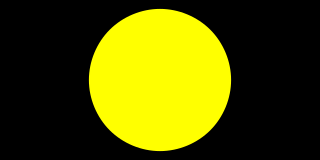

In [2]:
%%capture_png Dot.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Dot(color = YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.width = mob.width + 2*SMALL_BUFF
       # self.camera.frame.scale(1/20)

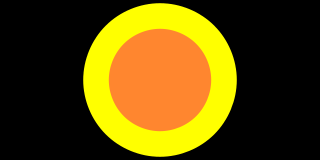

In [3]:
%%capture_png Circle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Circle(fill_opacity=1, fill_color= ORANGE, stroke_color=YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 3*SMALL_BUFF



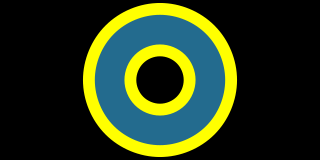

In [4]:
%%capture_png Annulus.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Annulus(inner_radius=0.5, outer_radius=1.2,fill_color= DARK_BLUE, stroke_color=YELLOW, stroke_width=2) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 3*SMALL_BUFF



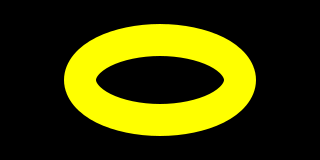

In [5]:
%%capture_png Ellipse.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Ellipse(color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 2*SMALL_BUFF


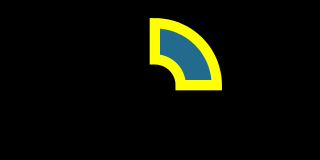

In [6]:
%%capture_png Sector.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Sector(inner_radius=0.5, outer_radius=1.2,fill_color= DARK_BLUE, stroke_color=YELLOW, stroke_width=2) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN+UR*0.05)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 5*SMALL_BUFF



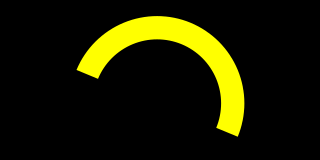

In [7]:
%%capture_png Arc.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Arc(radius=1.3, start_angle=-PI/8, angle=PI,color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 3*SMALL_BUFF


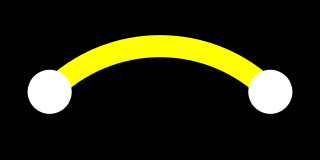

In [8]:
%%capture_png ArcBetweenPoints.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = ArcBetweenPoints(start=2 * RIGHT, end=2*LEFT, stroke_color=YELLOW) #ONLY
        mob = VGroup(mob, Dot(2 * RIGHT, radius=0.4), Dot(2*LEFT,radius=0.4) )
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 1*SMALL_BUFF


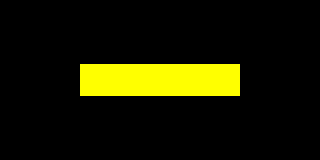

In [9]:
%%capture_png Line.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Line(color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 2*SMALL_BUFF


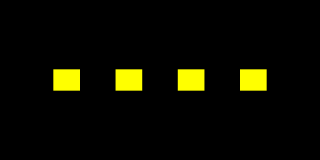

In [10]:
%%capture_png DashedLine.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = DashedLine(0.2*LEFT, 0.2*RIGHT,color= YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.width =  mob.width + 2*SMALL_BUFF
        


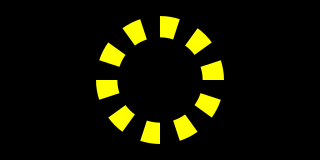

In [11]:
%%capture_png DashedCircle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        circ = Circle(stroke_color=YELLOW) #ONLY
        mob = DashedVMobject(circ, num_dashes=10) #ONLY

        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 4*SMALL_BUFF


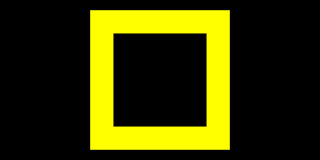

In [12]:
%%capture_png Square.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Square(color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 3.5*SMALL_BUFF


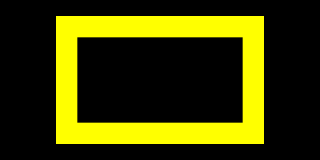

In [13]:
%%capture_png Rectangle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Rectangle(width=3.5, height=2.0, color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.height =  mob.height + 1*SMALL_BUFF


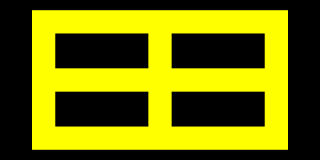

In [14]:
%%capture_png Rectangle_grid.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Rectangle(width=4, height=2.0,grid_xstep=2, grid_ystep=1,color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.width =  mob.width + 1.5*SMALL_BUFF


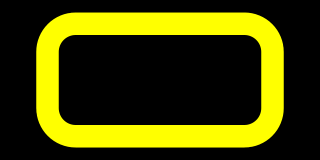

In [15]:
%%capture_png RoundedRectangle1.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RoundedRectangle(corner_radius=0.5, color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)


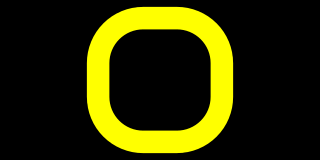

In [16]:
%%capture_png RoundedRectangle2.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RoundedRectangle(corner_radius=0.8, height=2.2, width=2.2,color= YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)

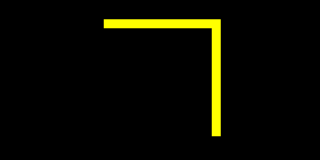

In [17]:
%%capture_png Elbow.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Elbow(width=0.5, angle=0*DEGREES,color= YELLOW) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.scale(1/10)

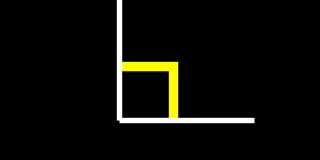

In [18]:
%%capture_png RightAngle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        line1 = Line( ORIGIN, RIGHT ) #ONLY
        line2 = Line( ORIGIN, UP ) #ONLY
        mob = RightAngle(line1, line2, color=YELLOW, stroke_width=7) #ONLY
        self.add(VGroup(mob,line1, line2).shift(DL*0.3)) #ONLY
        self.camera.frame.scale(1/6)

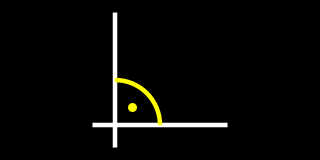

In [19]:
%%capture_png Angledot.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        line1 = Line( LEFT*0.2, RIGHT ) #ONLY
        line2 = Line( DOWN*0.2, UP ) #ONLY
        a= Angle(line1, line2, dot=True, color=YELLOW, dot_color=YELLOW) #ONLY
        self.add(VGroup(line1, line2, a).move_to(ORIGIN)) #ONLY
        self.camera.frame.scale(1/5)

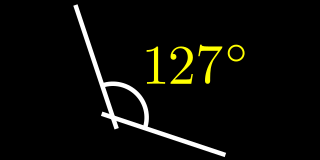

In [20]:
%%capture_png Angle_get_value.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        line1 = Line((LEFT+(1/3)*UP)*0.1, RIGHT+(1/3)*DOWN) #ONLY
        line2 = Line((DOWN+(1/3)*RIGHT)*0.1, UP+(1/3)*LEFT) #ONLY
        angle = Angle(line1, line2, radius=0.3) #ONLY
        value = Integer(angle.get_value(degrees=True), unit="^{\circ}", color=YELLOW) #ONLY
        value.next_to(angle, UR,buff=0) #ONLY

        self.add(VGroup(line1, line2, angle, value).move_to(ORIGIN)) #ONLY
        self.camera.frame.scale(1/5)

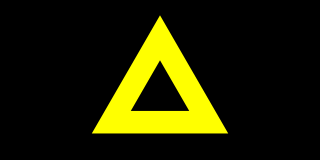

In [21]:
%%capture_png Triangle.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Triangle(color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)

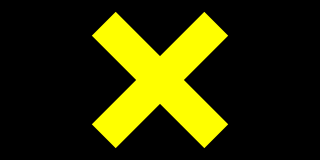

In [22]:
%%capture_png Cross.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Cross(stroke_color = YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)

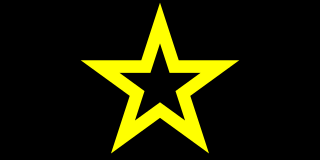

In [23]:
%%capture_png Star.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= Star(color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.2)
        self.camera.frame.scale(1/14)

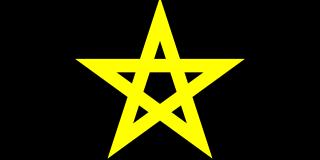

In [24]:
%%capture_png RegularPolygram5.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RegularPolygram(5,color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.2)
        self.camera.frame.scale(1/15)


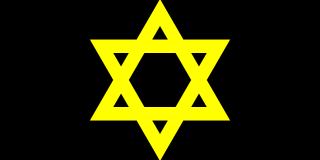

In [25]:
%%capture_png RegularPolygram6.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RegularPolygram(6,color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.2)
        self.camera.frame.scale(1/15)

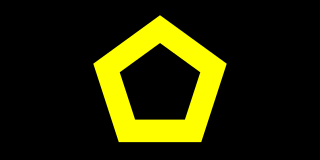

In [26]:
%%capture_png RegularPolygon5.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RegularPolygon(5,color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)

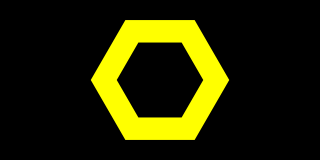

In [27]:
%%capture_png RegularPolygon6.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob= RegularPolygon(6,color= YELLOW) #ONLY
        mob.move_to(ORIGIN)
        self.add(mob)
        mob.scale(0.1)
        self.camera.frame.scale(1/25)

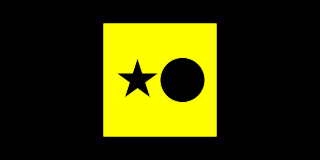

In [28]:
%%capture_png CutOut.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        s1 = Square().scale(2.5) #ONLY
        s2 = Star().shift(LEFT) #ONLY
        s3 = Circle().shift(RIGHT)  #ONLY
        c = Cutout(s1, s2, s3, fill_opacity=1, color=YELLOW)  #ONLY
        self.add(c)


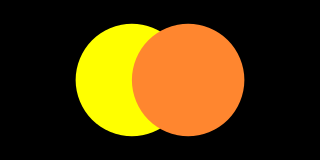

In [29]:
%%capture_png TwoCircles.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.scale(1/25)  #ONLY
        mob = Circle(color= YELLOW, fill_opacity=1,stroke_width=0).scale(0.1)  #ONLY
        mob2 = Circle(color= ORANGE, fill_opacity=1,stroke_width=0).scale(0.1) #ONLY
        x=VGroup(mob,mob2).arrange(RIGHT, buff=-0.1) #ONLY
        self.add(x)

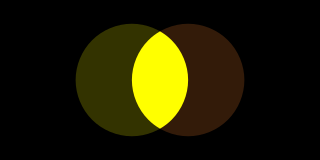

In [30]:
%%capture_png TwoCirclesIntersection.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.scale(1/25)
        mob = Circle(color= YELLOW, fill_opacity=1,stroke_width=0).scale(0.1)
        mob2 = Circle(color= ORANGE, fill_opacity=1,stroke_width=0).scale(0.1)
        x=VGroup(mob,mob2).arrange(RIGHT, buff=-0.1)
        bg=BackgroundRectangle(x, fill_opacity=0.8).scale(2)
        inter = Intersection(mob, mob2, color=YELLOW, fill_opacity=1,stroke_width=0)  #ONLY
        self.add(mob,mob2,bg,inter)

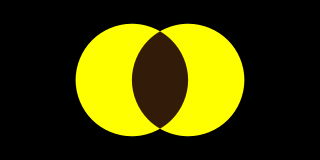

In [31]:
%%capture_png TwoCirclesExclusion.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.scale(1/25)
        mob = Circle(color= YELLOW, fill_opacity=1,stroke_width=0).scale(0.1)
        mob2 = Circle(color= ORANGE, fill_opacity=1,stroke_width=0).scale(0.1)
        x=VGroup(mob,mob2).arrange(RIGHT, buff=-0.1)
        bg=BackgroundRectangle(x, fill_opacity=0.8).scale(2)
        ex = Exclusion(mob2, mob, color=YELLOW, fill_opacity=1,stroke_width=0) #ONLY
        self.add(mob,mob2,bg,ex)
        

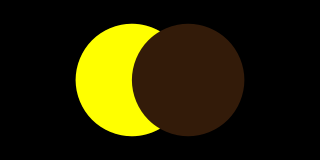

In [32]:
%%capture_png TwoCirclesDifference.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.scale(1/25)
        mob = Circle(color= YELLOW, fill_opacity=1,stroke_width=0).scale(0.1)
        mob2 = Circle(color= ORANGE, fill_opacity=1,stroke_width=0).scale(0.1)
        x=VGroup(mob,mob2).arrange(RIGHT, buff=-0.1)
        bg=BackgroundRectangle(x, fill_opacity=0.8).scale(2)
        diff = Difference(mob, mob2, color=YELLOW, fill_opacity=1,stroke_width=0) #ONLY
        self.add(mob,mob2,bg,diff)
        

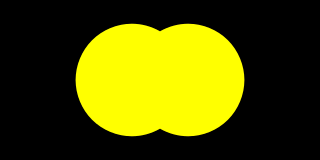

In [33]:
%%capture_png TwoCirclesUnion.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.frame.scale(1/25)
        mob = Circle(color= YELLOW, fill_opacity=1,stroke_width=0).scale(0.1)
        mob2 = Circle(color= ORANGE, fill_opacity=1,stroke_width=0).scale(0.1)
        x=VGroup(mob,mob2).arrange(RIGHT, buff=-0.1)
        bg=BackgroundRectangle(x, fill_opacity=0.8).scale(2)
        uni = Union(mob, mob2, color=YELLOW, fill_opacity=1,stroke_width=0) #ONLY
        self.add(mob,mob2,bg,uni)
        

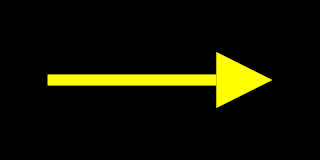

In [34]:
%%capture_png Arrow.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Arrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

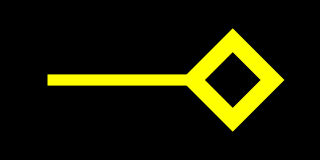

In [35]:
%%capture_png ArrowSquareTip.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Arrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW, tip_shape=ArrowSquareTip) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

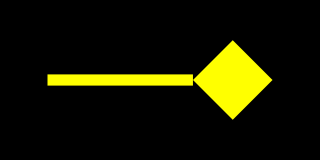

In [36]:
%%capture_png ArrowSquareFilledTip.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Arrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW, tip_shape=ArrowSquareFilledTip) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

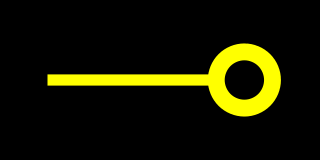

In [37]:
%%capture_png ArrowCircleTip.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Arrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW, tip_shape=ArrowCircleTip) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

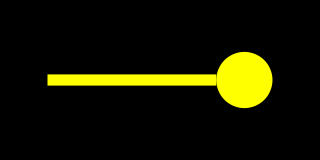

In [38]:
%%capture_png ArrowCircleFilledTip.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Arrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW, tip_shape=ArrowCircleFilledTip) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

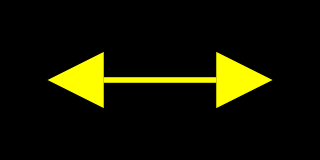

In [39]:
%%capture_png DoubleArrow.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = DoubleArrow(0.2*LEFT, 0.2*RIGHT,color= YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/25)

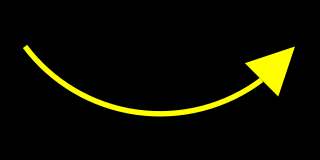

In [40]:
%%capture_png CurvedArrow.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = CurvedArrow(LEFT,RIGHT,color= YELLOW) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.scale(1/6)

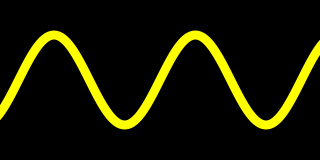

In [41]:
%%capture_png ParametricFunction.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = ParametricFunction(lambda t: [t,0.2*np.sin(10*t),0],t_range = [-TAU, TAU],color= YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/10)

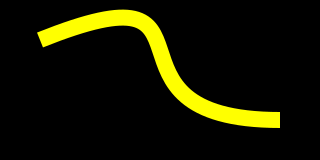

In [42]:
%%capture_png CubicBezier.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        p1 = [-3, 1, 0] #ONLY
        p1b=  p1 + 5 * RIGHT + 2 * UP #ONLY
        p2 = [3, -1, 0] #ONLY
        p2b = p2 + 5 * LEFT #ONLY
        mob = CubicBezier(p1,p1b, p2b, p2, color=YELLOW) #ONLY
        self.add(mob)
        mob.scale(0.1)
        mob.move_to(ORIGIN)
        self.camera.frame.width =  mob.width + 2*SMALL_BUFF

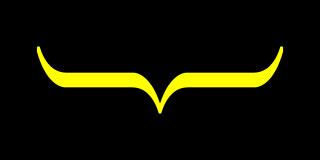

In [43]:
%%capture_png Brace.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Brace(Line(LEFT*0.5,RIGHT*0.5),color= YELLOW) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.width =  mob.width + 3*SMALL_BUFF

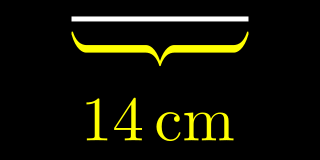

In [44]:
%%capture_png BraceLabel.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        l=Line(ORIGIN, RIGHT*1.4) #ONLY
        mob= BraceLabel(l, text= r"14 \, \text{cm}", color= YELLOW, buff=0.1) #ONLY
        mob.submobjects[1].set_color(YELLOW) #ONLY
        self.add(VGroup(l,mob).move_to(ORIGIN)) #ONLY
        self.camera.frame.height =  mob.height + 4*SMALL_BUFF 

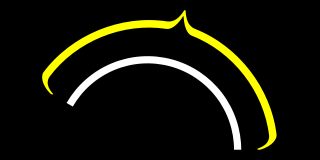

In [45]:
%%capture_png ArcBrace.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        arc = Arc(radius=0.5,start_angle=0,angle=5*PI/6) #ONLY
        brace = ArcBrace(arc).set_color(YELLOW) #ONLY
        mob = VGroup(arc,brace)        
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.scale(1/8)

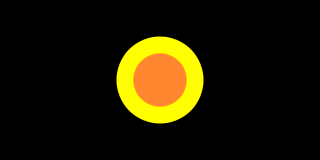

In [46]:
%%capture_png AnnotationDot.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = AnnotationDot(stroke_color=YELLOW, fill_color=ORANGE) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.scale(1/15)

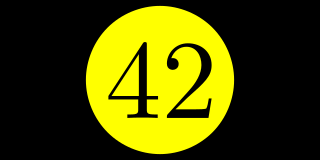

In [47]:
%%capture_png LabeledDot.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = LabeledDot(Tex("42", color=BLACK), color=YELLOW) #ONLY
        self.add(mob)
        mob.move_to(ORIGIN)
        self.camera.frame.scale(1/10)

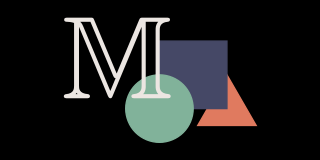

In [48]:
%%capture_png ManimBanner.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = ManimBanner() #ONLY
        self.add(mob)
        self.camera.frame.scale(1/1.5)

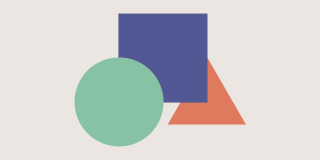

In [49]:
%%capture_png HTMLBanner.png
%%manim $params
#-v WARNING -r 80,80 -s  --disable_caching Example
class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = "#ece6e2" #HEREFROM
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        logo = VGroup(triangle, square, circle).scale(1.3)#.scale(2.0) #HERETO
        logo.move_to(ORIGIN)
        self.add(logo)
        self.camera.frame.scale(1/1.5)

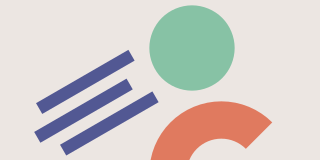

In [50]:
%%capture_png FlyingFramesBanner.png
%%manim $params
#-v WARNING -r 80,80 -s  --disable_caching Example

class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = "#ece6e2" #HEREFROM
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"        
        logo_black = BLACK
        d= Dot(color= logo_green, radius=0.8).shift(UR*0.6)
        l = VGroup(*[Line(color=logo_blue, stroke_width=70/3) for _ in range(0,3)])
        l.arrange(DOWN,buff=0.45).next_to(d, LEFT).shift(0.3*LEFT)
        l[0::2].shift(0.3*RIGHT)
        l.rotate(30*DEGREES, about_point=d.get_center())
        arc= Arc(radius=1.0, color= logo_red, start_angle=PI/4, angle=PI, stroke_width=70)
        arc.shift(1.75*DOWN+1.15*RIGHT)
        self.add(arc, d,l) #HERETO
        self.camera.frame.width = 3 *2 # take this *2 out for logo creation

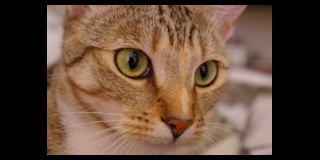

In [51]:
%%capture_png ImageMobject.png
%%manim $params

from PIL import Image
import requests
image = Image.open(requests.get("https://raw.githubusercontent.com/scikit-image/scikit-image/main/skimage/data/chelsea.png", stream=True).raw)

class Example(ZoomedScene):
    def construct(self):
        mob = ImageMobject(image).scale(2)  #ONLY
        self.add(mob)
        self.camera.frame.scale(1/1.5)

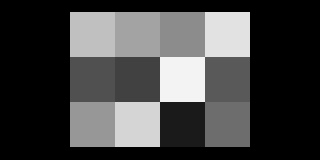

In [52]:
%%capture_png ImageMobject_nearest.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        np.random.seed(41)
        a= np.random.randint(0, 255, size=(3, 4)) #ONLY
        img = ImageMobject(np.uint8(a)) #ONLY
        img.height = 6 #ONLY
        img.set_resampling_algorithm(RESAMPLING_ALGORITHMS["nearest"]) #ONLY
        self.add(img)

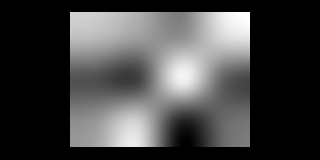

In [53]:
%%capture_png ImageMobject_cubic.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        np.random.seed(41) #ONLY
        a= np.random.randint(0, 255, size=(3, 4)) #ONLY
        img = ImageMobject(np.uint8(a)) #ONLY
        img.height = 6 #ONLY
        img.set_resampling_algorithm(RESAMPLING_ALGORITHMS["cubic"]) #ONLY
        self.add(img)

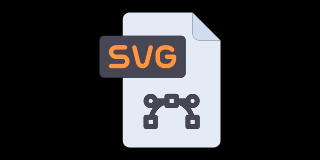

In [54]:
%%capture_png SVGMobject.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = SVGMobject("svg_logo.svg") #ONLY
        self.add(mob)
        self.camera.frame.scale(1/3)

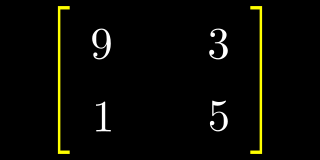

In [55]:
%%capture_png Matrix.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = Matrix([[9, 3], [1, 5]]) #ONLY
        bra = mob.get_brackets() #ONLY
        bra.set_color(YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/4)

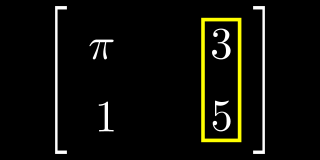

In [56]:
%%capture_png Matrix_SurroundingRectangle.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = Matrix([["\pi", 3], [1, 5]]) #ONLY
        mob.add(SurroundingRectangle(mob.get_columns()[1])) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/4)

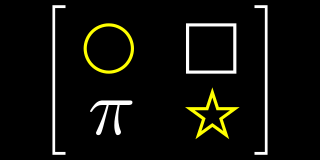

In [57]:
%%capture_png MobjectMatrix.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        a = Circle(color=YELLOW).scale(0.3) #ONLY
        b = Square().scale(0.3) #ONLY
        c = MathTex("\pi").scale(2) #ONLY
        d = Star(color=YELLOW).scale(0.3) #ONLY
        mob = MobjectMatrix([[a, b], [c, d]]) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/3.5)

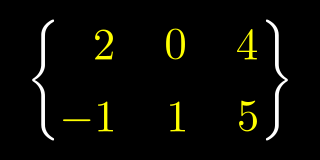

In [58]:
%%capture_png Matrix_bracket.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = Matrix([[2, 0, 4], [-1, 1, 5]], #ONLY
            v_buff=0.8, #ONLY
            h_buff=0.8, #ONLY
            bracket_h_buff=SMALL_BUFF, #ONLY
            bracket_v_buff=SMALL_BUFF, #ONLY
            left_bracket="\{", #ONLY
            right_bracket="\}") #ONLY
        mob.set_row_colors(YELLOW, YELLOW) #ONLY
        self.add(mob)
        self.camera.frame.scale(1/4)

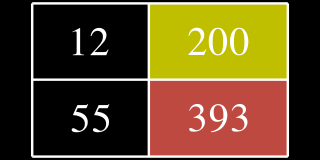

In [59]:
%%capture_png Table_add_highlighted_cell.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        mob = Table( #ONLY
            [["12", "200"], #ONLY
            ["55","393"]], include_outer_lines=True) #ONLY
        mob.add_highlighted_cell((1,2), color=YELLOW)     #ONLY
        mob.add_highlighted_cell((2,2), color=RED)     #ONLY

        self.add(mob)
        self.camera.frame.scale(1/2.7)

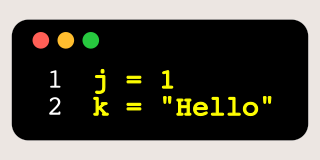

In [60]:
%%capture_png Code.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = "#ece6e2" #HEREFROM
        code= """j = 1 
k = "Hello" """
        rendered_code = Code(code=code, background_stroke_color= WHITE, tab_width=2, background="window",
                            language="Python", font="Monospace").scale(3.7) #HERETO
        rendered_code[2].set_color(YELLOW)
        rendered_code[2].set_stroke(width=5) 
        self.add(rendered_code)

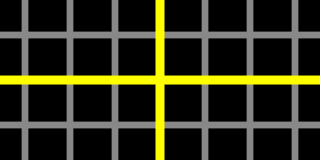

In [61]:
%%capture_png NumberPlane.png
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        number_plane = NumberPlane( #HEREFROM
            x_range=[-10, 10, 1],
            y_range=[-10, 10, 1],
            stroke_width=100,
            axis_config = {
                "stroke_color": YELLOW,
                "stroke_width": 20,
            },
            background_line_style={
                "stroke_color": GREY,
                "stroke_width": 15,
                "stroke_opacity": 1
            }
        )
        self.add(number_plane) #HERETO
        self.camera.frame.scale(1/2)

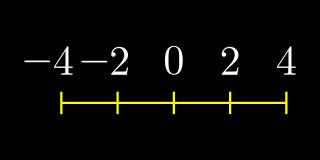

In [62]:
%%capture_png NumberLine.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = NumberLine( #HEREFROM
            x_range=[-4, 4, 2],
            length=2,
            color=YELLOW,
            include_numbers=True,
            label_direction=UP,
        )

        self.add(mob.move_to(ORIGIN)) #HERETO
        self.camera.frame.scale(1/5)

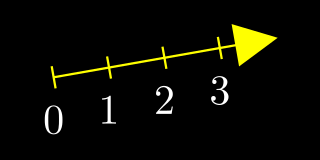

In [63]:
%%capture_png NumberLine_rotation.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = NumberLine( #HEREFROM
            x_range=[0, 4, 1],
            length=2,
            include_tip=True,
            color=YELLOW,
            include_numbers=True,
            rotation=10 * DEGREES,
        )
        self.add(mob.move_to(ORIGIN)) #HERETO
        self.camera.frame.scale(1/5)

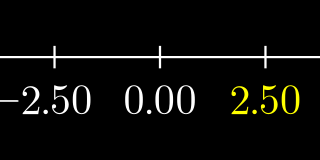

In [64]:
%%capture_png NumberLine_decimal.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        mob = NumberLine( #HEREFROM
            x_range=[-4, 4, 2.5], 
            length=3,
            decimal_number_config={"num_decimal_places": 2},
            include_numbers=True,
        )
        mob.numbers[2].set_color(YELLOW) #HERETO
        self.add(mob.move_to(ORIGIN))
        self.camera.frame.scale(1/5)

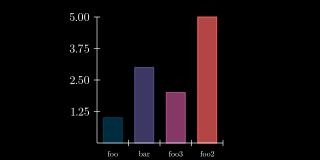

In [65]:
%%capture_png BarChart.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        vals = [1, 3, 2, 5] #HEREFROM
        labels = [
            "foo",
            "bar",
            "foo3",
            "foo2",
        ]
        colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361"]
        bar = BarChart(
            vals,
            bar_colors=colors,
            bar_names=labels,
        ) #HERETO
        self.add(bar) 
        self.camera.frame.scale(1/1.4)

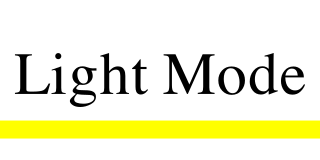

In [66]:
%%capture_png Light_change_default.png
%%manim $params

class Example(ZoomedScene):
    def construct(self):
        self.camera.background_color = WHITE #HEREFROM
        Text.set_default(color=BLACK)
        Line.set_default(color=YELLOW)
        Line.set_default(stroke_width=20)

        mob = Text("Light Mode") 
        l=Line(2*LEFT,2*RIGHT).next_to(mob,DOWN)
        self.add(mob,l)

        Line.set_default()
        Text.set_default() #HERETO
        self.camera.frame.scale(1/4)